# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [20]:
# Import relevant libraries and modules.

import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import plot_importance

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [21]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

airline_data = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\Python-For-Data-Analysis\Course-6\Data\module_4_data\Invistico_Airline.csv', on_bad_lines='skip')



### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [22]:
# Display the first ten rows of data.

airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [23]:
# Display the data type for each column in your DataFrame.

airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the methods for exploring DataFrames.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Recall a property of a `pandas` DataFrame that allows you to view the data type for each column.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `.dtypes` on your DataFrame `airline_data` to view the data type of each column.</details>

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?



### **Target Variable:**  
The target variable for passenger satisfaction is **"satisfaction"**, as this is the outcome we aim to predict.  

### **Initial Hypothesis:**  
Key factors likely to influence passenger satisfaction can be grouped into three main categories:  

#### **1. Service-Related Factors** (Expected to have a strong positive impact):  
- Seat comfort  
- Food and drink  
- Inflight WiFi service  
- Inflight entertainment  
- Online support  
- Ease of online booking  
- On-board service  
- Legroom service  
- Check-in service  
- Cleanliness  
- Baggage handling  

#### **2. Travel-Related Factors** (May influence satisfaction based on travel preferences):  
- Flight distance  
- Type of travel (business vs. personal)  
- Travel class (economy, business, first class)  

#### **3. Delay-Related Factors** (Expected to have a negative correlation with satisfaction):  
- Departure delay in minutes  
- Arrival delay in minutes  

### **Hypothesis:**  
Passengers who experience **better service quality, premium travel accommodations, and minimal delays** are more likely to report higher satisfaction. In particular, **departure and arrival delays** may have a **negative correlation** with satisfaction, as delays tend to impact passengers' overall experience.

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

- Since this is a **binary classification problem**, evaluating model performance requires more than just accuracy.  
- **Key metrics include**:  
  - **Precision** (useful when minimizing false positives is critical)  
  - **Recall** (important when reducing false negatives is a priority)  
  - **F1 Score** (balances precision and recall, making it ideal for imbalanced data)  
  - **ROC AUC Score** (measures the model's ability to distinguish between classes across different thresholds)  
- The choice of metric depends on whether the focus is on reducing **false positives (Type I error)** or **false negatives (Type II error)**, or achieving a balance between them.

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [24]:
# Convert the object predictor variables to numerical dummies.

airline_data_dummies = pd.get_dummies(airline_data, 
                                         columns=['satisfaction','Customer Type','Type of Travel','Class'])

In this case, pd.get_dummies() is applied without drop_first=True, meaning it creates dummy variables for all categories of the categorical columns. This approach is often used for models that do not require a strict avoidance of multicollinearity, such as tree-based models (e.g., decision trees, random forests, and boosting algorithms).

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about feature engineering](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/5mEqu/introduction-to-feature-engineering).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pandas` function for transforming categorical data into "dummy" variables.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `get_dummies()` function on your DataFrame `airline_data` to create dummies for the categorical variables in your dataset. Note that your target variable will also need this treatment.</details>

### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [25]:
# Define the y (target) variable.

y = airline_data_dummies['satisfaction_satisfied']

# Define the X (predictor) variables.

X = airline_data_dummies.drop(['satisfaction_satisfied','satisfaction_dissatisfied'], axis = 1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into x and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, use square brackets `[]` to subset your DataFrame by specifying which column(s) to select. Also, quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

In this case, your target variable was split into two columns from the dummy split. Be sure to include only the column which assigns a positive (i.e., "satisfied") outcome as 1.
</details>

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [26]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To perform the splitting, call the function in the `model_selection` module of `sklearn` on the features and target variable.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`. Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [27]:
# Define xgb to be your XGBClassifier.

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a classifier model from `xgboost`](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that the target variable in this case is a binary variable. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `XGBClassifier()` from `xgboost`. Set the objective as `binary:logistic`.
</details>

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, consider tuning `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and/or `colsample_bytree`.

Consider a more limited range for each hyperparameter to allow for timely iteration and model training. For example, using a single possible value for each of the six hyperparameters listed above will take approximately one minute to run on this platform.

```
{
    'max_depth': [4],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
```

If you add just one new option, for example by changing `max_depth: [4]` to `max_depth: [3, 6]`, and keep everything else the same, you can expect the run time to approximately double. If you use two possibilities for each hyperparameter, the run time would extend to ~1 hour. 
         

In [28]:
# Define parameters for tuning as `cv_params`.

cv_params = {'max_depth': [4, 6],
              'min_child_weight': [3, 5],
              'learning_rate': [0.1, 0.2, 0.3],
              'n_estimators': [5,10,15],
              'subsample': [0.7],
              'colsample_bytree': [0.7]
              }

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about hyperparameter tuning using GridSearch cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider a range of values for each parameter, similar to what you observed in the lesson. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define these parameters using a Python dictionary in the following format: `{'parameter1': [range,of,values]}`</details>

**Question:** What is the likely effect of adding more estimators to your GridSearch?

Adding more estimators in GridSearch increases the number of boosting rounds, which can enhance model accuracy but also comes with trade-offs:  

- **Improved Performance**: Initially, more estimators contribute to better learning and reduce bias, leading to higher accuracy.  
- **Longer Training Time**: As the number of estimators increases, computation time grows significantly, making GridSearch more resource-intensive.  
- **Risk of Overfitting**: Excessive estimators can cause the model to fit noise in the training data, reducing generalization to unseen data.  
- **Tuned with Learning Rate**: A **higher number of estimators** is often balanced with a **lower learning rate** to prevent overfitting while maintaining strong performance.

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [29]:
# Define your criteria as `scoring`.

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about [using metric evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree) to determine the metrics you include.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider what you've learned about the limitations of only including a single metric, such as `accuracy`. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define metrics which balance the false positives and false negatives in binary classification problems.

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [30]:
# Construct your GridSearch.

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about constructing a GridSearch for [cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/W4vAW/verify-performance-using-validation).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Balance the time spent on validation with the number of folds you choose. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Choose the refit method which simultaneously balances false positives and false negatives.

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [31]:
%%time
# fit the GridSearch model to training data

xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: total: 6min 1s
Wall time: 15.8 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

**Question:** Which optimal set of parameters did the GridSearch yield?

{
 'colsample_bytree': 0.7,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 15,
 'subsample': 0.7
}


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about the result of the GridSearch.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Once you've fitted the GridSearch model to your training data, there will be an attribute to access which yields to the optimal parameter set.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Access the `best_params_` attribute from your fitted model. </details>

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [32]:
path = r'C:\Users\saswa\Documents\GitHub\Python-For-Data-Analysis\Course-6\Module_4\fit_models\Module_4\\'

Use `pickle` to save the trained model.

In [33]:
# Pickle the model
with open(path + 'xgb_cv_model_airline.pickle', 'wb') as to_write:
    pickle.dump(xgb_cv, to_write) 

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about "pickling" prior models](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/FSnam/build-and-validate-a-random-forest-model-using-a-validation-data-set).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The model to be pickled is the fitted GridSearch model from above. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `pickle.dump()`, reference the fitted GridSearch model, and provide a name for the pickle file.

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [34]:
# Apply your model to predict on your test data. Call this output "y_pred".

y_pred = xgb_cv.predict(X_test)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about creating predictions from trained models.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the fitted GridSearch model from your training set and predict the predictor variables you reserved in the train-test split.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `predict()` on your fitted model and reference `X_test` to create these predictions.
</details>

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [35]:
# 1. Print your accuracy score.

ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.

pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.

rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.

f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.9364952263627965
precision score: 0.9482680295286768
recall score: 0.9355182072829131
f1 score: 0.9418499717992104


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation for detail on these metrics](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `metrics` module in `sklearn` to compute each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test` and `y_pred` into each.
</details>

**Question:** How should you interpret your accuracy score?

The accuracy score of 0.9365 (or 93.65%) indicates that the model correctly classified 93.65% of all instances in the dataset. This means that, overall, the model performs well in distinguishing between the classes.

**Question:** Is your accuracy score alone sufficient to evaluate your model?

No, accuracy alone is not sufficient to evaluate the model. If the dataset has class imbalance, a high accuracy score may be misleading, as the model could simply predict the majority class most of the time. Instead, metrics like **precision, recall, and F1-score** provide a more comprehensive evaluation by considering false positives and false negatives, ensuring balanced performance across both classes.

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

**Interpreting Precision and Recall Scores**  

- **Precision (0.948)**: **94.8% of the instances predicted as satisfied were actually satisfied**. A high precision score indicates that the model makes relatively few false positive errors.  
- **Recall (0.936)**: **93.6% of actual satisfied passengers were correctly identified by the model**. A high recall score suggests that the model effectively captures most of the positive cases while keeping false negatives low.  

**Which Metric is More Important?**  
It depends on the problem context:  

- If reducing **false positives** is a priority (e.g., predicting VIP customers for premium services), **precision matters more**.  
- If minimizing **false negatives** is crucial (e.g., ensuring all satisfied customers receive retention offers), **recall is more important**.  

**Balancing Both Metrics**  
- The **F1 score (0.942)** balances precision and recall, ensuring the model performs well in both areas.  
- Since **precision and recall are close**, the model is well-calibrated, minimizing both types of errors.

**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*


The **F1 score** provides a **balance between precision and recall**, offering a single metric that accounts for both false positives and false negatives.  

### **Interpretation of Your F1 Score (0.9418)**
- **Precision (0.9483)**: **94.83% of predicted positive cases are actually positive** (i.e., fewer false positives).  
- **Recall (0.9355)**: **93.55% of actual positive cases were correctly identified** (i.e., fewer false negatives).  
- The **F1 score (0.9418)** combines both, ensuring a balanced measure of predictive performance.  

### **Why is F1 Important?**
- If **precision is high** but **recall is low**, the model is **too conservative**, missing many real positives.  
- If **recall is high** but **precision is low**, the model is **too lenient**, leading to too many false positives.  
- **F1 balances this trade-off**, making it especially useful when **both false positives and false negatives have consequences** (e.g., fraud detection, medical diagnosis).  

While **F1 is harder to interpret** than precision or recall alone, it **ensures the model isn’t overly biased toward one metric**, providing a more comprehensive evaluation.

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

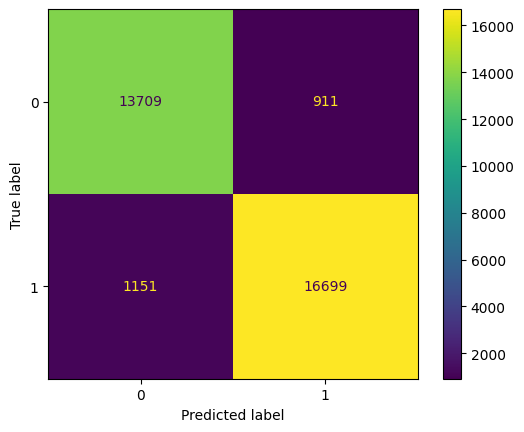

In [36]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)

# Plot the visual in-line.

disp.plot()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the functions in the `metrics` module to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Next, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

### **Observations from the Confusion Matrix**  

- **True Positives (TP) = 16,699** → Correctly predicted **satisfied (1)** cases.  
- **True Negatives (TN) = 13,709** → Correctly predicted **dissatisfied (0)** cases.  
- **False Positives (FP) = 911** → Incorrectly predicted **satisfied (1)** when actually **dissatisfied (0)**.  
- **False Negatives (FN) = 1,151** → Incorrectly predicted **dissatisfied (0)** when actually **satisfied (1)**.  

Since **false negatives (1,151) are higher than false positives (911)**, the model **misses** satisfied customers more often than it incorrectly predicts dissatisfaction.  

### **Does This Correlate to Other Metrics?**  

- **Accuracy:**  
  $$  
  \frac{TP + TN}{TP + TN + FP + FN} = \frac{16699 + 13709}{16699 + 13709 + 911 + 1151} \approx 0.937  
  $$  
  This matches the **accuracy score: 0.9365**.  

- **Precision (for satisfied class):**  
  $$  
  \frac{TP}{TP + FP} = \frac{16699}{16699 + 911} \approx 0.948  
  $$  
  This aligns with the **precision score: 0.9483**, indicating that **94.83% of predicted "satisfied" cases were actually satisfied**.  

- **Recall (for satisfied class):**  
  $$  
  \frac{TP}{TP + FN} = \frac{16699}{16699 + 1151} \approx 0.935  
  $$  
  This matches the **recall score: 0.9355**, meaning the model correctly identified **93.55% of all actual satisfied customers**.  

- **F1 Score:**  
  $$  
  2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} = 2 \times \frac{0.948 \times 0.935}{0.948 + 0.935} \approx 0.942  
  $$  
  This corresponds to the **F1 score: 0.9418**, balancing precision and recall.

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

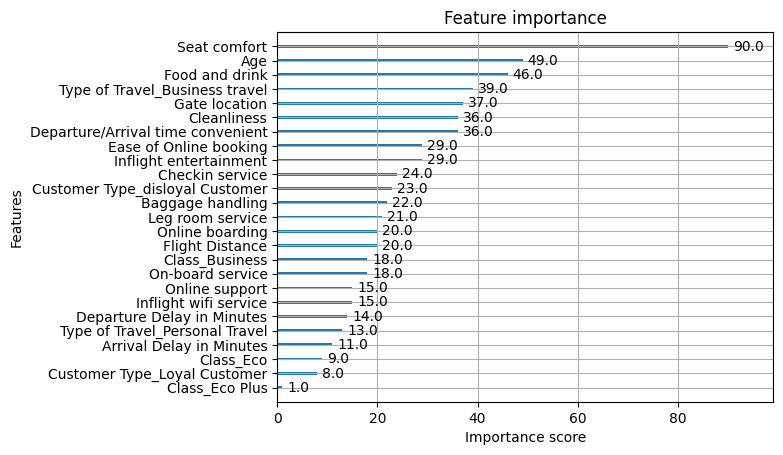

In [37]:
# Plot the relative feature importance of the predictor variables in your model.

plot_importance(xgb_cv.best_estimator_)


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the attributes that are provided once the model is fitted to training data.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Examine the `best_estimator_` attribute of your fitted model.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To easily visualize feature importance, call the built-in `plot_importance` function `xgboost` offers on the `best_estimator_`.</details>

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

### **Assessment of Feature Importance Results**  

1. **Most Influential Feature: "Seat Comfort" (90.0)**  
   - It is expected that seat comfort plays the biggest role in passenger satisfaction, as it directly affects the overall flight experience.  
   - The strong influence could also be related to the differences in seating between first class and economy, reinforcing how premium seating enhances satisfaction.  

2. **Surprisingly High Impact of "Age" (49.0)**  
   - Age ranking second is unexpected. While it may correlate with travel preferences, its strong influence suggests potential underlying factors, such as differences in expectations or comfort needs across age groups.  

3. **Food & Drink (46.0) and Service Factors**  
   - In-flight meals and beverages significantly impact the passenger experience, making this ranking logical.  
   - Other service-related factors such as **cleanliness (36.0), gate location (37.0), inflight entertainment (29.0), ease of online booking (29.0), and baggage handling (22.0)** also contribute meaningfully to satisfaction.  

4. **"Type of Travel" (Business Travel: 39.0)**  
   - Business travelers likely have higher expectations regarding service and comfort, which aligns with this feature’s importance.  

5. **Surprise: Low Impact of Delays**  
   - *Departure Delay (14.0) and Arrival Delay (11.0)* ranked lower than expected.  
   - This suggests that while delays are frustrating, passengers might prioritize overall comfort and service over punctuality.  

6. **Surprise: Class Importance is Lower than Expected**  
   - *Class (Business: 18.0, Economy: 9.0, Economy Plus: 1.0)* had less influence than anticipated.  
   - This indicates that **within-class service quality matters more than simply flying in a premium class**.  

### **Conclusion:**  
- The results reinforce that **comfort and service-related factors** dominate passenger satisfaction.  
- The **unexpected importance of age** and the **lower-than-expected influence of delays and travel class** were surprising.  
- **Airlines should prioritize enhancing seat comfort, food quality, and service experiences rather than focusing solely on reducing delays** to improve overall satisfaction.

### Compare models

Create a table of results to compare model performance.

In [38]:
# Create a table of results to compare model performance.

table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest", "Tuned XGBoost"],
                      'F1': [0.945422, 0.947306, f1_score],
                      'Recall': [0.935863, 0.944501, rc_score],
                      'Precision': [0.955197, 0.950128, pc_score],
                      'Accuracy': [0.940864, 0.942450, ac_score]
                     }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450
2,Tuned XGBoost,0.941850,0.935518,0.948268,0.936495


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a DataFrame and using the `pd.DataFrame()` function. 

</details>

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

### **Comparison of Tuned Models: Decision Tree, Random Forest, and XGBoost**  

1. **Best Overall Model: Random Forest**  
   - **Highest F1 Score (0.9473)** → Best balance between precision and recall.  
   - **Highest Recall (0.9445)** → Captures more actual positive cases.  
   - **Highest Accuracy (0.9425)** → Most reliable overall performance.  

2. **Decision Tree vs. XGBoost**  
   - **Decision Tree has higher precision (0.9552)** than both models, meaning fewer false positives.  
   - **Decision Tree slightly outperforms XGBoost** in F1 score (0.9454 vs. 0.9418).  
   - **XGBoost maintains a strong recall (0.9355)**, balancing false negatives and positives effectively.  

3. **XGBoost Trade-offs**  
   - **Lowest F1 score (0.9418)** and slightly lower accuracy (0.9365).  
   - Still maintains a solid **precision (0.9483) and recall (0.9355)** balance.  
   - Computational efficiency is better than a deep decision tree.  

### **Key Takeaways:**  
- **Random Forest is the strongest performer** across all key metrics.  
- **Decision Tree offers higher precision**, making it preferable when minimizing false positives.  
- **XGBoost remains competitive**, but it slightly lags behind in overall performance.  

For **balanced performance with computational efficiency**, **Random Forest and XGBoost are preferable** over a standalone decision tree.

## Considerations

**What are some key takeaways you learned from this lab?**

### **Key Takeaways from This Lab:**  

- **Model Performance Matters:** Among the models tested, **Random Forest achieved the highest F1 score (0.9473)**, making it the most balanced in terms of precision and recall.  
- **Accuracy is Not Enough:** Metrics like **precision, recall, and F1 score** provide a more complete picture of model effectiveness, especially when class imbalance is present.  
- **Feature Importance Insights:** **Seat comfort, food quality, and age** were the strongest predictors of passenger satisfaction, while **delays had a lower-than-expected impact**.  
- **Trade-offs in Predictions:** The model **misses satisfied customers (false negatives) more often than it falsely predicts satisfaction (false positives)**. Adjusting the decision threshold could improve recall if minimizing false negatives is a priority.  
- **Data Splitting is Crucial:** A proper **train-test split ensures** that the model is tested on unseen data, providing a reliable estimate of real-world performance.
  
**How would you share your findings with your team?**

### **How I Would Share These Findings with My Team:**  

1. **Overview of the Model’s Performance**  
   - Summarize key evaluation metrics (**F1 score, precision, recall, and accuracy**) to highlight model effectiveness.  
   - Compare different models (Decision Tree, Random Forest, XGBoost) and justify the final selection.  

2. **Visual Representations**  
   - **Confusion matrix** to show prediction strengths and weaknesses.  
   - **Feature importance chart** to explain what drives satisfaction predictions.  
   - **Performance comparison table** for a quick view of metrics across models.  

3. **Key Takeaways & Next Steps**  
   - Explain why some features were more predictive than expected (e.g., seat comfort vs. delays).  
   - Discuss possible refinements: **threshold tuning, handling class imbalance, or improving feature engineering**.  
   - Suggest potential **real-world applications**, such as using insights to improve customer experience strategies.
  
**What would you share with and recommend to stakeholders?**

### **Recommendations for Stakeholders:**  

1. **Invest in Seat Comfort & In-Flight Services**  
   - Seat comfort is the **strongest predictor of satisfaction**, suggesting that **improving seating options** (e.g., better cushioning, more legroom) may have the highest impact on customer experience.  
   - Food and drink quality also ranked high, indicating that **enhancing meal options** could boost satisfaction levels.  

2. **Personalized Customer Experience Based on Age**  
   - Since **age significantly influences satisfaction**, airlines should explore **age-based service personalization**, such as tailored meal options, entertainment preferences, or targeted loyalty programs.  

3. **Service Quality Over Delay Management**  
   - Surprisingly, **departure and arrival delays were not among the top factors affecting satisfaction**. While punctuality is important, focusing on **service improvements (check-in experience, baggage handling, inflight entertainment, cleanliness)** may provide a **greater return on investment** in customer satisfaction.  

4. **Strategic Marketing & Customer Retention**  
   - If the goal is to **retain satisfied customers**, adjusting the model’s decision threshold could help **identify and engage high-value passengers** more effectively.  
   - Airlines could use **data-driven marketing strategies** to tailor promotions or loyalty programs to frequent travelers identified by the model.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged